<a href="https://colab.research.google.com/github/victor98dl/Tcc_victor/blob/main/Treinamento_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trato

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dados_treino = pd.read_csv('/content/drive/MyDrive/Datasets/csv_do_R_train/statistics.csv', sep=',', encoding='utf-8')
dados_teste = pd.read_csv('/content/drive/MyDrive/Datasets/csv_do_R_Test/statistics.csv', sep=',', encoding='utf-8')
df_concat = pd.concat([dados_treino, dados_teste])
df_concat = df_concat.reset_index(drop=True)

In [ ]:
X = df_concat.iloc[:, 1:5].values
X

array([[1.52320000e+04, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.51910000e+04, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.08830000e+04, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.01494080e+07, 5.00000000e-01, 0.00000000e+00, 5.32574794e+06],
       [3.80284900e+06, 1.28333333e+01, 0.00000000e+00, 1.53141322e+06],
       [3.79763400e+06, 1.28333333e+01, 0.00000000e+00, 1.53184019e+06]])

In [ ]:
X.shape

(166528, 4)

In [ ]:
y = df_concat.iloc[:, 7].values

In [ ]:
y.shape

(166528,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_teste, y_val, y_teste = train_test_split(X_teste, y_teste, test_size=0.5, random_state=42)

In [ ]:
X_treino.shape

(99916, 4)

In [ ]:
X_teste.shape

(33306, 4)

In [ ]:
X_val.shape

(33306, 4)

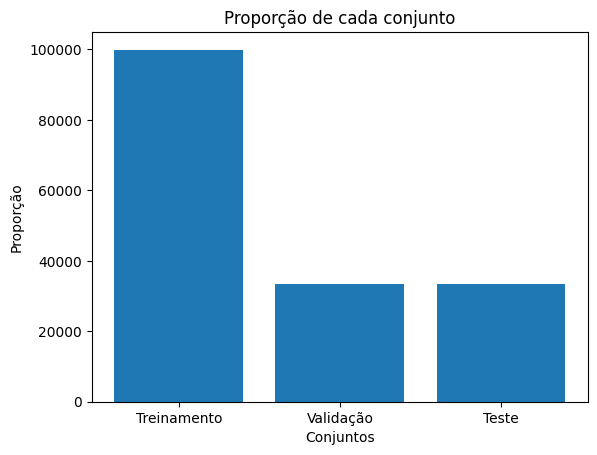

In [ ]:
import matplotlib.pyplot as plt

# Proporções de cada conjunto
proporcoes = [len(X_treino), len(X_val), len(X_teste)]

# Nomes dos conjuntos
nomes_conjuntos = ['Treinamento', 'Validação', 'Teste']

# Criação do gráfico de barras
plt.bar(nomes_conjuntos, proporcoes)

# Adiciona rótulos aos eixos
plt.xlabel('Conjuntos')
plt.ylabel('Proporção')

# Título do gráfico
plt.title('Proporção de cada conjunto')

# Exibe o gráfico
plt.show()

# Normalização

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

In [ ]:
scaler = StandardScaler()
X_treino_esc = scaler.fit_transform(X_treino)
#joblib.dump(scaler, 'scaler.pkl')
X_teste_esc = scaler.transform(X_teste)
X_val_esc = scaler.transform(X_val)

In [ ]:
scaler = RobustScaler()
X_treino_esc = scaler.fit_transform(X_treino)
#joblib.dump(scaler, 'scaler.pkl')
X_teste_esc = scaler.transform(X_teste)
X_val_esc = scaler.transform(X_val)

In [ ]:
X_treino_esc

array([[-0.13912803,  0.37225334,  0.        , -0.13173458],
       [-0.12738921, -0.43906804,  0.        , -0.11753269],
       [-0.13928129, -0.43906804,  0.        , -0.13173458],
       ...,
       [-0.13922803, -0.04931561,  0.        , -0.13162243],
       [ 0.03843614,  1.8549757 ,  1.33001296,  0.05089472],
       [ 1.3601119 , -0.42581116,  0.        ,  1.49866814]])

In [ ]:
X_teste_esc

array([[ 0.33724072,  0.39313293,  1.18840637,  0.42410838],
       [-0.09648326,  1.02250356,  1.38231096, -0.09012397],
       [ 0.31828088, -0.41520565,  0.        ,  0.6245625 ],
       ...,
       [-0.13114796, -0.39283465,  0.        , -0.11689738],
       [ 0.30833928,  1.94717131,  1.38231096,  0.36447928],
       [-0.13923381,  0.0063633 ,  0.        , -0.13167278]])

In [ ]:
previsoresdf_treino = pd.DataFrame(previsores_esc_treino)
previsoresdf_treino

,0,1,2,3
0,-0.148291,-0.418194,0.000000,-0.160555
1,-0.148301,-0.418194,0.000000,-0.160555
2,-0.138969,-0.418194,0.000000,-0.160555
3,-0.146103,-0.424084,0.000000,-0.160555
4,-0.146169,-0.424084,0.000000,-0.160555
...,...,...,...,...
76651,-0.152196,-0.243455,0.000000,-0.160423
76652,-0.152179,-0.243455,0.000000,-0.160390
76653,-0.152177,-0.243455,0.000000,-0.160388
76654,-0.132679,-0.021289,0.217075,-0.155426


In [ ]:
previsoresdf_teste = pd.DataFrame(previsores_esc_teste)
previsoresdf_teste

,0,1,2,3
0,-0.152227,0.298429,0.000000,-0.160469
1,-0.146123,0.789267,0.000000,-0.160555
2,-0.146019,0.298429,0.000000,-0.146309
3,-0.152224,0.212042,0.000000,-0.160464
4,-0.120510,2.796556,0.890442,-0.153937
...,...,...,...,...
89867,7.717014,-0.420718,0.000000,5.348166
89868,10.338462,-0.420812,0.000000,5.272766
89869,10.345423,-0.421139,0.000000,5.342836
89870,0.842042,-0.348495,0.000000,1.421939


In [ ]:
previsoresdf_treino.describe()

,0,1,2,3
count,76656.000000,76656.000000,76656.000000,7.665600e+04
mean,0.743959,0.364116,0.359892,7.325536e-01
std,1.729624,4.367286,0.576852,1.510034e+00
min,-0.152273,-0.424084,0.000000,-1.605549e-01
25%,-0.141528,-0.410995,0.000000,-1.559819e-01
50%,0.000000,0.000000,0.000000,1.503738e-17
75%,0.858472,0.589005,1.000000,8.440181e-01
max,10.761362,758.803665,1.736010,2.440513e+01


In [ ]:
previsoresdf_teste.describe()

,0,1,2,3
count,89872.000000,89872.000000,89872.000000,89872.000000
mean,0.841022,0.334703,0.361246,0.796490
std,1.907999,3.437380,0.571486,1.618684
min,-0.152273,-0.424084,0.000000,-0.160555
25%,-0.139958,-0.410995,0.000000,-0.151263
50%,-0.015246,0.019634,0.000000,-0.027994
75%,0.936885,0.588269,0.969813,1.033710
max,10.876225,564.396597,1.736010,28.844465


# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel='rbf', random_state=42, C = 3000, gamma=300)
svm.fit(X_treino_esc, y_treino)

SVC(C=3000, gamma=300, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
previsoes_svm_val = svm.predict(X_val_esc)
previsoes_svm_val

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_val, previsoes_svm_val) *100.0))

Acurácia: 94.72%


In [ ]:
confusion_matrix(y_val, previsoes_svm_val)

array([[13590,  1321],
       [  436, 17959]])

In [ ]:
print(classification_report(y_val, previsoes_svm_val))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     14911
           1       0.93      0.98      0.95     18395

    accuracy                           0.95     33306
   macro avg       0.95      0.94      0.95     33306
weighted avg       0.95      0.95      0.95     33306



In [ ]:
previsoes_svm = svm.predict(X_teste_esc)
previsoes_svm

array([0, 1, 0, ..., 1, 1, 1])

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_svm) *100.0))

Acurácia: 94.93%


In [ ]:
confusion_matrix(y_teste, previsoes_svm)

array([[13616,  1264],
       [  423, 18003]])

In [ ]:
print(classification_report(y_teste, previsoes_svm))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94     14880
           1       0.93      0.98      0.96     18426

    accuracy                           0.95     33306
   macro avg       0.95      0.95      0.95     33306
weighted avg       0.95      0.95      0.95     33306



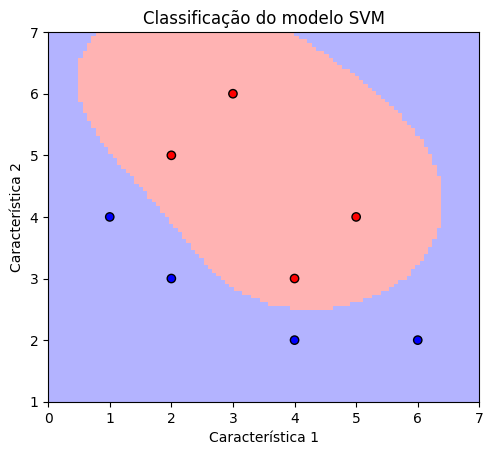

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Dados fictícios para visualização
X = np.array([[2, 3], [4, 2], [1, 4], [3, 6], [5, 4], [6, 2], [2, 5], [4, 3]])
y = np.array(['normal', 'normal', 'normal', 'ddos', 'ddos', 'normal', 'ddos', 'ddos'])

# Mapear as classes para valores numéricos
class_mapping = {'normal': 0, 'ddos': 1}
y_numeric = np.array([class_mapping[label] for label in y])

# Escalonar os dados (se necessário)
# ...

# Treinamento do modelo SVM
svm = SVC(kernel='rbf', random_state=1, C=3000)
svm.fit(X, y_numeric)

# Gerar pontos para o gráfico
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotar a classificação
plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin='lower', alpha=0.3, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y_numeric, cmap='bwr', edgecolor='k')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Classificação do modelo SVM')
plt.show()


In [ ]:
import joblib
joblib.dump(svm, 'svm.joblib')
from google.colab import files
files.download('svm.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Regressão logística

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistica = LogisticRegression(random_state=1, max_iter=15000, penalty="l2",tol=0.0001,solver="lbfgs")
logistica.fit(X_treino_esc, y_treino)

LogisticRegression(max_iter=15000, random_state=1)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
previsoes_logistica_val = logistica.predict(X_val_esc)
previsoes_logistica_val

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_val, previsoes_logistica_val) *100.0))

Acurácia: 78.51%


In [ ]:
previsoes_logistica = logistica.predict(X_teste_esc)
previsoes_logistica

array([0, 1, 1, ..., 0, 1, 1])

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_logistica) *100.0))

Acurácia: 79.11%


In [ ]:
confusion_matrix(y_teste, previsoes_logistica)

array([[ 9713,  5167],
       [ 1791, 16635]])

In [ ]:
print(classification_report(y_teste, previsoes_logistica))

              precision    recall  f1-score   support

           0       0.84      0.65      0.74     14880
           1       0.76      0.90      0.83     18426

    accuracy                           0.79     33306
   macro avg       0.80      0.78      0.78     33306
weighted avg       0.80      0.79      0.79     33306



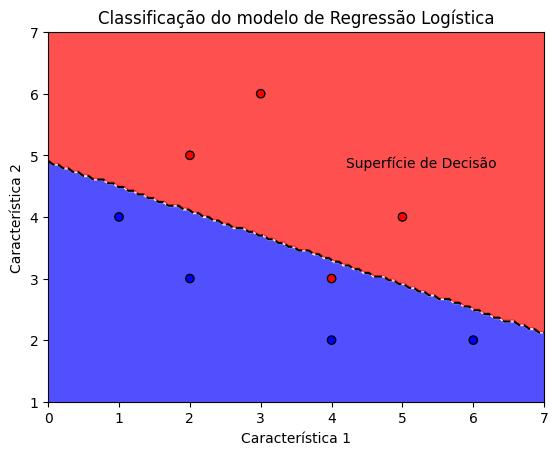

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Dados fictícios para visualização
X = np.array([[2, 3], [4, 2], [1, 4], [3, 6], [5, 4], [6, 2], [2, 5], [4, 3]])
y = np.array(['normal', 'normal', 'normal', 'ddos', 'ddos', 'normal', 'ddos', 'ddos'])

# Mapear as classes para valores numéricos
class_mapping = {'normal': 0, 'ddos': 1}
y_numeric = np.array([class_mapping[label] for label in y])

# Treinamento do modelo de Regressão Logística
logistica = LogisticRegression(random_state=1, max_iter=15000, penalty="l2", tol=0.0001, C=1, solver="lbfgs")
logistica.fit(X, y_numeric)

# Gerar pontos para o gráfico
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = logistica.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotar a classificação
plt.contourf(xx, yy, Z, alpha=0.8, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y_numeric, cmap='bwr', edgecolor='k')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Classificação do modelo de Regressão Logística')

# Adicionar destaque e nome para a superfície de decisão
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linestyles='dashed')
plt.text(4.2, 4.8, 'Superfície de Decisão', color='black', fontsize=10)

plt.show()




In [ ]:
import joblib
joblib.dump(logistica, 'rl.joblib')
from google.colab import files
files.download('rl.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3,algorithm='auto',leaf_size=30, metric='minkowski',p=2, weights='uniform')
knn.fit(X_treino_esc, y_treino)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
previsoes_knn = knn.predict(X_teste_esc)
previsoes_knn

array([0, 1, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
previsoes_knn_val = knn.predict(X_val_esc)
previsoes_knn_val

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_val, previsoes_knn_val) *100.0))

Acurácia: 97.85%


In [ ]:
confusion_matrix(y_val, previsoes_knn_val)

array([[14503,   408],
       [  308, 18087]])

In [ ]:
print(classification_report(y_val, previsoes_knn_val))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     14911
           1       0.98      0.98      0.98     18395

    accuracy                           0.98     33306
   macro avg       0.98      0.98      0.98     33306
weighted avg       0.98      0.98      0.98     33306



In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_knn) *100.0))

Acurácia: 97.78%


In [ ]:
confusion_matrix(y_teste, previsoes_knn)

array([[14461,   419],
       [  320, 18106]])

In [ ]:
print(classification_report(y_teste, previsoes_knn))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     14880
           1       0.98      0.98      0.98     18426

    accuracy                           0.98     33306
   macro avg       0.98      0.98      0.98     33306
weighted avg       0.98      0.98      0.98     33306



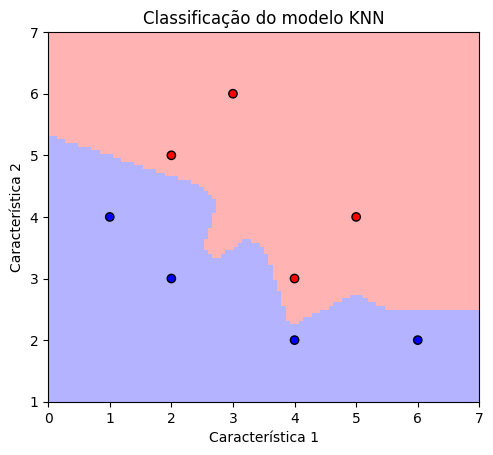

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Dados fictícios para visualização
X = np.array([[2, 3], [4, 2], [1, 4], [3, 6], [5, 4], [6, 2], [2, 5], [4, 3]])
y = np.array(['normal', 'normal', 'normal', 'ddos', 'ddos', 'normal', 'ddos', 'ddos'])

# Mapear as classes para valores numéricos
class_mapping = {'normal': 0, 'ddos': 1}
y_numeric = np.array([class_mapping[label] for label in y])

# Escalonar os dados (se necessário)
# ...

# Treinamento do modelo KNN
knn = KNeighborsClassifier(n_neighbors=3, algorithm='auto', leaf_size=30, metric='minkowski', p=2, weights='uniform')
knn.fit(X, y_numeric)

# Gerar pontos para o gráfico
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotar a classificação
plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin='lower', alpha=0.3, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y_numeric, cmap='bwr', edgecolor='k')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Classificação do modelo KNN')
plt.show()


In [ ]:
import joblib

In [ ]:
import joblib
joblib.dump(knn, 'knn.joblib')
from google.colab import files
files.download('knn.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
arvore = DecisionTreeClassifier(criterion='entropy', random_state =0)
arvore.fit(X_treino_esc, y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
previsoes_arvore_val = arvore.predict(X_val_esc)
previsoes_arvore_val

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_val, previsoes_arvore_val) *100.0))

Acurácia: 98.14%


In [ ]:
confusion_matrix(y_val, previsoes_arvore_val)

array([[14605,   306],
       [  313, 18082]])

In [ ]:
print(classification_report(y_val, previsoes_arvore_val))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     14911
           1       0.98      0.98      0.98     18395

    accuracy                           0.98     33306
   macro avg       0.98      0.98      0.98     33306
weighted avg       0.98      0.98      0.98     33306



In [ ]:
previsoes_arvore = arvore.predict(X_teste_esc)
previsoes_arvore

array([0, 1, 0, ..., 1, 1, 1])

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_arvore) *100.0))

Acurácia: 98.06%


In [ ]:
confusion_matrix(y_teste, previsoes_arvore)

array([[14536,   344],
       [  301, 18125]])

In [ ]:
print(classification_report(y_teste, previsoes_arvore))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     14880
           1       0.98      0.98      0.98     18426

    accuracy                           0.98     33306
   macro avg       0.98      0.98      0.98     33306
weighted avg       0.98      0.98      0.98     33306



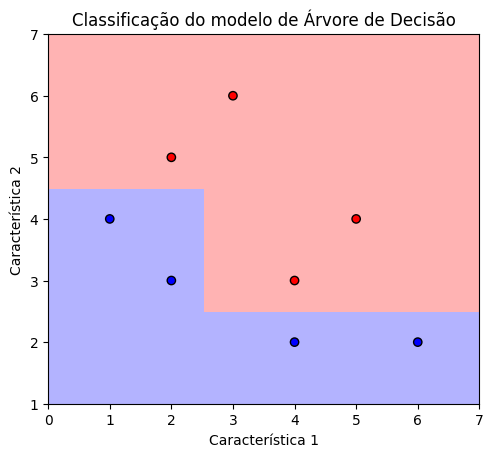

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Dados fictícios para visualização
X = np.array([[2, 3], [4, 2], [1, 4], [3, 6], [5, 4], [6, 2], [2, 5], [4, 3]])
y = np.array(['normal', 'normal', 'normal', 'ddos', 'ddos', 'normal', 'ddos', 'ddos'])

# Mapear as classes para valores numéricos
class_mapping = {'normal': 0, 'ddos': 1}
y_numeric = np.array([class_mapping[label] for label in y])

# Treinamento do modelo de Árvore de Decisão
arvore = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore.fit(X, y_numeric)

# Gerar pontos para o gráfico
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = arvore.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotar a classificação
plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin='lower', alpha=0.3, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y_numeric, cmap='bwr', edgecolor='k')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Classificação do modelo de Árvore de Decisão')
plt.show()


In [ ]:
import joblib
joblib.dump(arvore, 'dt.joblib')
from google.colab import files
files.download('dt.joblib')

In [ ]:
import time
from sklearn.tree import DecisionTreeClassifier

# Criar o modelo de árvore de decisão
arvore = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Definir os dados de treinamento

# Medir o tempo de treinamento
start_time = time.time()

# Treinar o modelo
arvore.fit(X_treino_esc, y_treino)

# Calcular o tempo de treinamento
end_time = time.time()
tempo_treinamento = end_time - start_time

print("Tempo de treinamento:", tempo_treinamento, "segundos")


Tempo de treinamento: 0.728137731552124 segundos


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random = RandomForestClassifier(n_estimators=100, criterion='entropy' ,random_state =0,)
random.fit(X_treino_esc, y_treino)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

In [ ]:
previsoes_random_val = random.predict(X_val_esc)
previsoes_random_val

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_val, previsoes_random_val) *100.0))

Acurácia: 98.55%


In [ ]:
confusion_matrix(y_val, previsoes_random_val)

array([[14646,   265],
       [  219, 18176]])

In [ ]:
print(classification_report(y_val, previsoes_random_val))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     14911
           1       0.99      0.99      0.99     18395

    accuracy                           0.99     33306
   macro avg       0.99      0.99      0.99     33306
weighted avg       0.99      0.99      0.99     33306



In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_val, previsoes_random_val, digits=3)
print(report)

              precision    recall  f1-score   support

           0      0.985     0.982     0.984     14911
           1      0.986     0.988     0.987     18395

    accuracy                          0.985     33306
   macro avg      0.985     0.985     0.985     33306
weighted avg      0.985     0.985     0.985     33306



In [ ]:
previsoes_random = random.predict(X_teste_esc)
previsoes_random

array([0, 1, 0, ..., 1, 1, 1])

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_random) *100.0))

Acurácia: 98.50%


In [ ]:
confusion_matrix(y_teste, previsoes_random)

array([[14593,   287],
       [  212, 18214]])

In [ ]:
report= classification_report(y_teste, previsoes_random, digits=3)
print(report)

              precision    recall  f1-score   support

           0      0.986     0.981     0.983     14880
           1      0.984     0.988     0.986     18426

    accuracy                          0.985     33306
   macro avg      0.985     0.985     0.985     33306
weighted avg      0.985     0.985     0.985     33306



In [ ]:
import joblib
joblib.dump(random, 'rf.joblib')
from google.colab import files
files.download('rf.joblib')